# C3.1 Atomic emission spectra
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/10/11

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf,UnivariateSpline
from scipy.signal import argrelextrema

## Simulated spectra

In [16]:
# Wavelength -> RGB
def GetRGB(dWave,maxPix=1,gamma=1):
    waveArea = [380,440,490,510,580,645,780]
    minusWave = [0,440,440,510,510,645,780]
    deltWave = [1,60,50,20,70,65,35]
    for p in range(len(waveArea)):
        if dWave<waveArea[p]:
            break
    pVar = abs(minusWave[p]-dWave)/deltWave[p]
    rgbs = [[0,0,0],[pVar,0,1],[0,pVar,1],[0,1,pVar],
            [pVar,1,0],[1,pVar,0],[1,0,0],[0,0,0]]
    if (dWave>=380) & (dWave<420):
        alpha = 0.3+0.7*(dWave-380)/(420-380)
    elif (dWave>=420) & (dWave<701):
        alpha = 1.0
    elif (dWave>=701) & (dWave<780):
        alpha = 0.3+0.7*(780-dWave)/(780-700)
    else:
        alpha = 0
    return [maxPix*(c*alpha)**gamma for c in rgbs[p]]
# plot
def DrawSpec(Lam):
    pic = np.zeros([120,360,3])
    for l in Lam:
        pic[:,(l-400):(l+1-400),:] = np.tile(np.array([GetRGB(d) for d in np.arange(l,l+1,1)]), (120,1,1))
    a = plt.imshow(pic)
    plt.yticks([])
    plt.xlabel('Wavelength $\lambda /nm$')
    plt.title('(2) Simulated spectrum.', y=-0.2)
    plt.xticks(range(0,360,50),['400','450','500','550','600','650','700','750'])
    return a

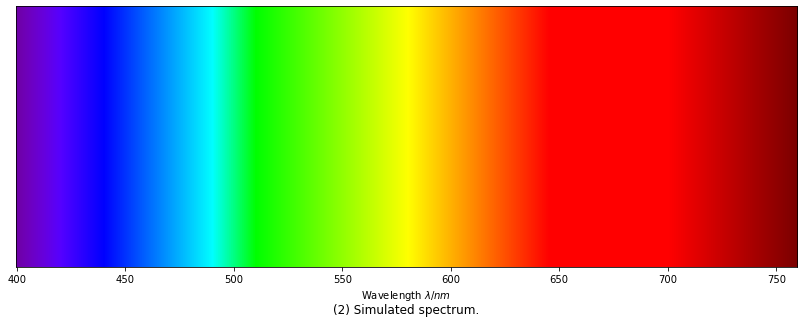

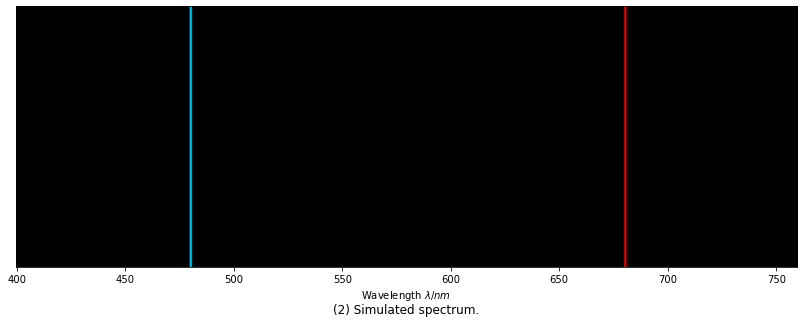

In [17]:
fig = plt.figure(figsize=(14, 7))
DrawSpec(np.arange(400,760,1))
plt.show()
fig = plt.figure(figsize=(14, 7))
DrawSpec([480,680])
plt.show()

## Mercury lamp

In [160]:
df_mer = pd.read_csv('C3.1-Data\Mercury.txt', sep='\s+')
Mer_line = (df_mer['Wavelength'][df_mer['Value']>5000]).reset_index(drop=True)
# print(Mer_line)
Mer_line = np.array([(Mer_line.iloc[0:7]).mean(), 
                    (Mer_line.iloc[7:11]).mean(),
                    (Mer_line.iloc[11:13]).mean(),
                    (Mer_line.iloc[13:18]).mean(),
                    492.1,
                    (Mer_line.iloc[18:22]).mean(),
                    (Mer_line.iloc[22:25]).mean(),
                    (Mer_line.iloc[25:27]).mean()])
Mer_line

array([366.24285714, 405.45      , 408.55      , 436.6       ,
       492.1       , 546.45      , 577.2       , 579.25      ])

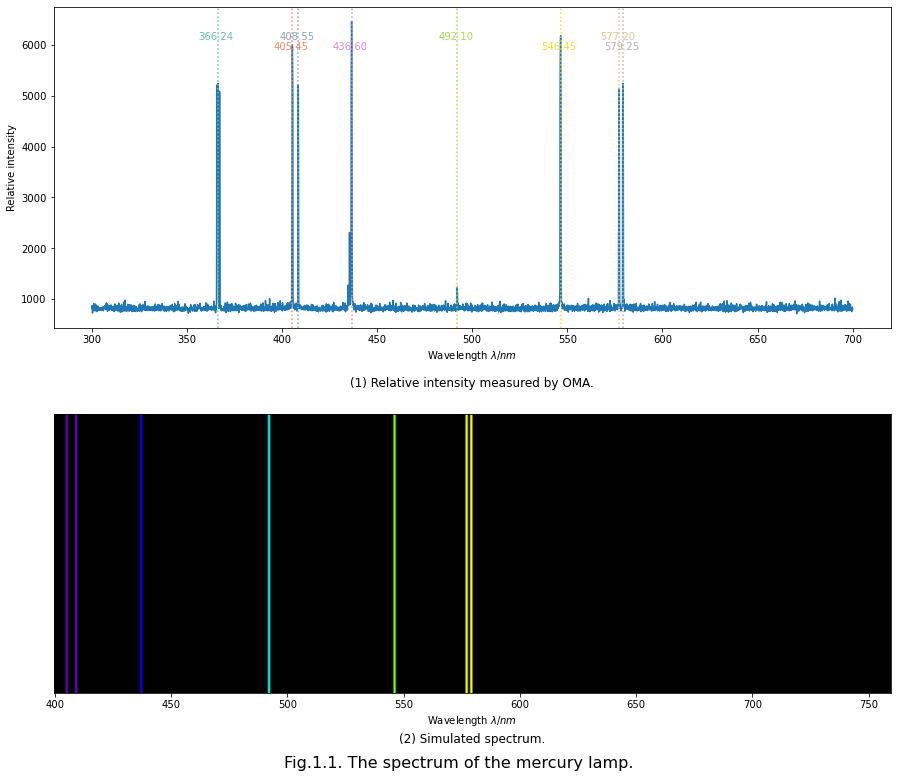

In [161]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_mer.iloc[:, 0], df_mer.iloc[:, 1])
for i in np.arange(0, len(Mer_line), 1):
    ax[0].axvline(x = Mer_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(Mer_line[i]), xy=(Mer_line[i]-10, 6000+(-1)**i*100), color=plt.cm.Set2(i))
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.', y=-0.2)

ax[1] = DrawSpec((np.rint(Mer_line)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.1.1. The spectrum of the mercury lamp.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.1.1.png', bbox_inches='tight', dpi=300)

### Calibration
The prominent mercury lines are at 435.835 nm (blue), 546.074 nm (green), and a pair at 576.959 nm and 579.065 nm (yellow-orange). There are two other blue lines at 404.656 nm and 407.781 nm and a weak line at 491.604 nm.

Ref: [Atomic Spectra@gsu](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/atspect2.html#c2)

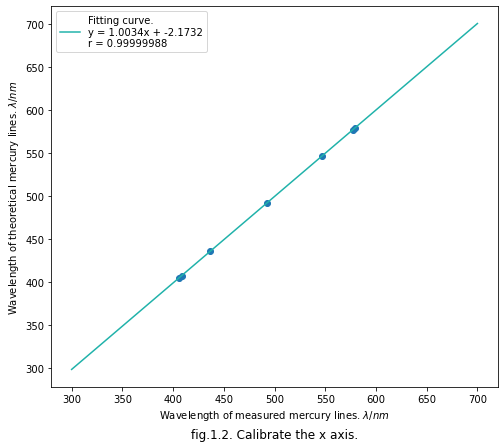

In [172]:
Mer_the = np.array([404.656, 407.781, 435.835, 491.604, 546.074, 576.959, 579.065])

scale_func = np.polyfit(Mer_line[1:], Mer_the, deg=1)
exp_dns = np.linspace(300, 700, 50)
the_reg = np.polyval(scale_func, exp_dns)

r = np.corrcoef(Mer_line[1:], Mer_the)[0,1]

A1, A2 = tuple(scale_func)

plt.figure(figsize= (8,7))
plt.scatter(Mer_line[1:], Mer_the)
plt.plot(exp_dns, the_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4f}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()
plt.xlabel('Wavelength of measured mercury lines. $\lambda /nm$')
plt.ylabel('Wavelength of theoretical mercury lines. $\lambda /nm$')
plt.title('fig.1.2. Calibrate the x axis.', y=-0.15)
plt.savefig(r'C3.1-Output\fig.1.2.png', bbox_inches = 'tight', dpi=300)    

## Hydrogen-Deuterium Lamp

In [21]:
df_HD = pd.read_csv('C3.1-Data\Hydrogen-Deuterium.txt', sep='\s+')
df_HD['Wavelength'] = np.polyval(scale_func, df_HD['Wavelength'])

HD_line = (df_HD['Wavelength'][df_HD['Value']>4000]).reset_index(drop=True)
print(HD_line)
HD_line = np.array([(HD_line.iloc[0:7]).mean(), 
                    (HD_line.iloc[7:15]).mean()])
HD_line

0     485.862400
1     485.962736
2     486.063073
3     486.163409
4     486.263745
5     486.364081
6     486.464418
7     655.832047
8     655.932383
9     656.032720
10    656.133056
11    656.233392
12    656.333728
13    656.434065
14    656.534401
Name: Wavelength, dtype: float64


array([486.16340889, 656.18322406])

Text(0.5, 0.08, 'Fig.2. The spectrum of the Hydrogen-Deuterium lamp.')

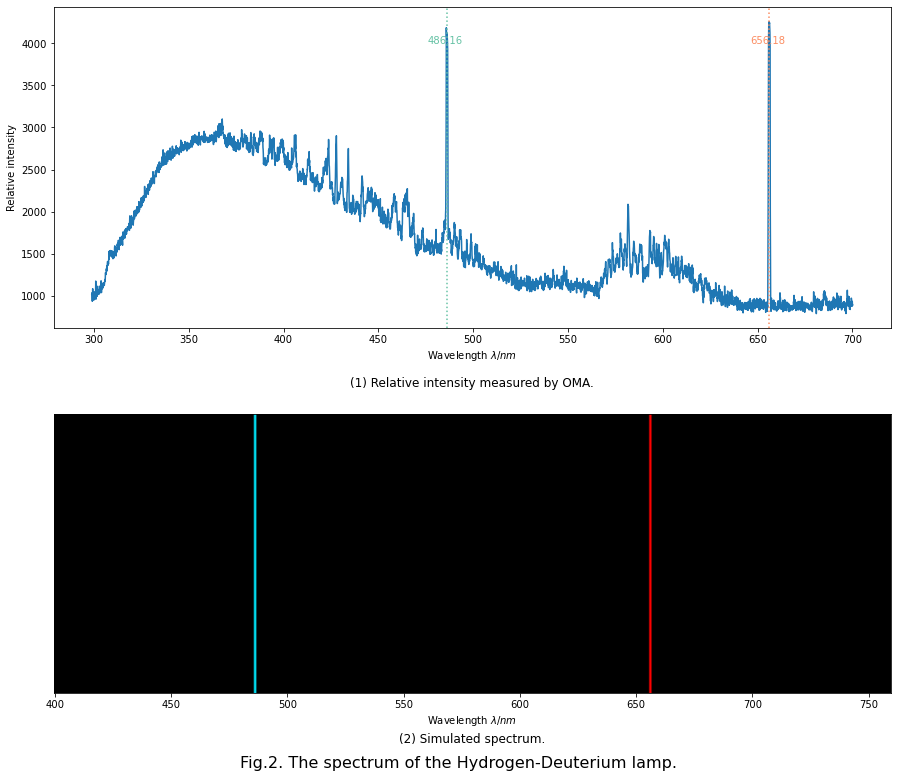

In [22]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_HD.iloc[:, 0], df_HD.iloc[:, 1])
for i in np.arange(0, len(HD_line), 1):
    ax[0].axvline(x = HD_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(HD_line[i]), xy=(HD_line[i]-10, 4000), color=plt.cm.Set2(i))
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.', y=-0.2)

ax[1] = DrawSpec((np.rint(HD_line)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.2. The spectrum of the Hydrogen-Deuterium lamp.', y=0.08, fontsize=16)
# plt.savefig(r'C3.1-Output/Fig.2.png', bbox_inches='tight', dpi=300)

## Sodium Lamp

In [23]:
df_SOD = pd.read_csv('C3.1-Data\Sodium.txt', sep='\s+')
df_SOD['Wavelength'] = np.polyval(scale_func, df_SOD['Wavelength'])

df_SOD2 = df_SOD.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(587,591,10000)
itp_func = Rbf(df_SOD2.iloc[:, 0], df_SOD2.iloc[:, 1], smooth = 10)
SOD_itp = itp_func(lam_dns)

SOD_line_index = argrelextrema(np.array(SOD_itp), np.greater, order=1000)
print(SOD_line_index)
SOD_line = lam_dns[SOD_line_index]
print(SOD_line)
SOD_line = SOD_line[2:]
print(SOD_line)

(array([ 499, 2507, 4919, 6387], dtype=int64),)
[587.19961996 588.00290029 588.96779678 589.55505551]
[588.96779678 589.55505551]


In [25]:
baseline = (SOD_itp[np.where(SOD_itp<1000)]).mean()
halfline_1 = (SOD_itp[SOD_line_index][2]+baseline)/2
halfline_2 = (SOD_itp[SOD_line_index][3]+baseline)/2
print(halfline_1, halfline_2)

halflam_1 = lam_dns[np.where((SOD_itp >= halfline_1-6) & (SOD_itp <= halfline_1+6))]
print(halflam_1)
halflam_1 = halflam_1[0:2]
print(halflam_1)
FWHM_1 = halflam_1[1] - halflam_1[0]

halflam_2 = lam_dns[np.where((SOD_itp >= halfline_2-7) & (SOD_itp <= halfline_2+7))]
print(halflam_2)
halflam_2 = halflam_2[1:]
print(halflam_2)
FWHM_2 = halflam_2[1] - halflam_2[0]

2706.1085242708796 2651.774545627747
[588.8389839  589.09740974 589.44784478 589.68026803]
[588.8389839  589.09740974]
[589.09940994 589.44664466 589.68226823]
[589.44664466 589.68226823]


In [30]:
def DrawSpec_SOD(Lam):
    pic = np.zeros([330,1000,3])
    for l in np.around(Lam, 3):
        pic[:,int(1000*(l-588.8)):int(1000*(l-588.8))+2,:] = np.tile(np.array([GetRGB(d) for d in np.arange(l,l+0.001,0.001)]), (330,1,1))
    a = plt.imshow(pic)
    plt.yticks([])
    plt.xlabel('Wavelength $\lambda /nm$')
    plt.title('(2) Simulated spectrum.', y=-0.2)
    plt.xticks(range(0,1000,100),['588.8','589.9','589.0','589.1','589.2','589.3','589.4','589.5','589.6','589.7'])
    return a

Text(0.5, 0.08, 'Fig.3. The spectrum of the Sodium lamp.')

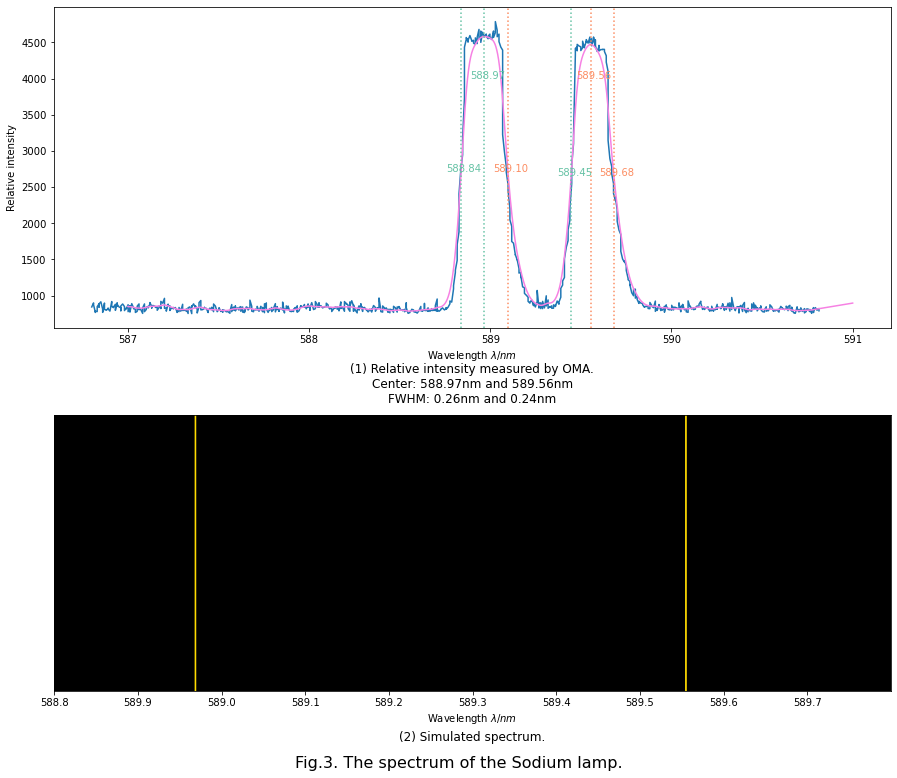

In [31]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_SOD.iloc[:, 0], df_SOD.iloc[:, 1])
ax[0].plot(lam_dns, SOD_itp, color='#F681E3')

for i in np.arange(0, len(SOD_line), 1):
    ax[0].axvline(x = SOD_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(SOD_line[i]), xy=(SOD_line[i]-0.08, 4000), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam_1), 1):
    ax[0].axvline(x = halflam_1[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam_1[i]), xy=(halflam_1[i]-0.08, halfline_1), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam_2), 1):
    ax[0].axvline(x = halflam_2[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam_2[i]), xy=(halflam_2[i]-0.08, halfline_2), color=plt.cm.Set2(i))

ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm and {:.2f}nm\nFWHM: {:.2f}nm and {:.2f}nm'.format(SOD_line[0],SOD_line[1],FWHM_1,FWHM_2), y=-0.25)

ax[1] = DrawSpec_SOD(SOD_line)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.3. The spectrum of the Sodium lamp.', y=0.08, fontsize=16)
# plt.savefig(r'C3.1-Output/Fig.3.png', bbox_inches='tight', dpi=300)

## LED

### red

In [61]:
df_RED = pd.read_csv('C3.1-Data\LED-red.txt', sep='\s+')
df_RED['Wavelength'] = np.polyval(scale_func, df_RED['Wavelength'])

df_RED2 = df_RED.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(550,650,10000)
itp_func = Rbf(df_RED2.iloc[:, 0], df_RED2.iloc[:, 1], smooth = 1000)
RED_itp = itp_func(lam_dns)

RED_line_index = argrelextrema(np.array(RED_itp), np.greater, order=1000)
print(RED_line_index)
RED_line = lam_dns[RED_line_index]
print(RED_line)

(array([7762], dtype=int64),)
[627.62776278]


In [73]:
baseline = (RED_itp[np.where(RED_itp<1000)]).mean()
halfline = (RED_itp[RED_line_index]+baseline)/2
print(halfline)

halflam = lam_dns[np.where((RED_itp >= halfline-0.5) & (RED_itp <= halfline+0.5))]
print(halflam)
FWHM = halflam[1] - halflam[0]

[1593.54535625]
[616.63666367 638.20882088]


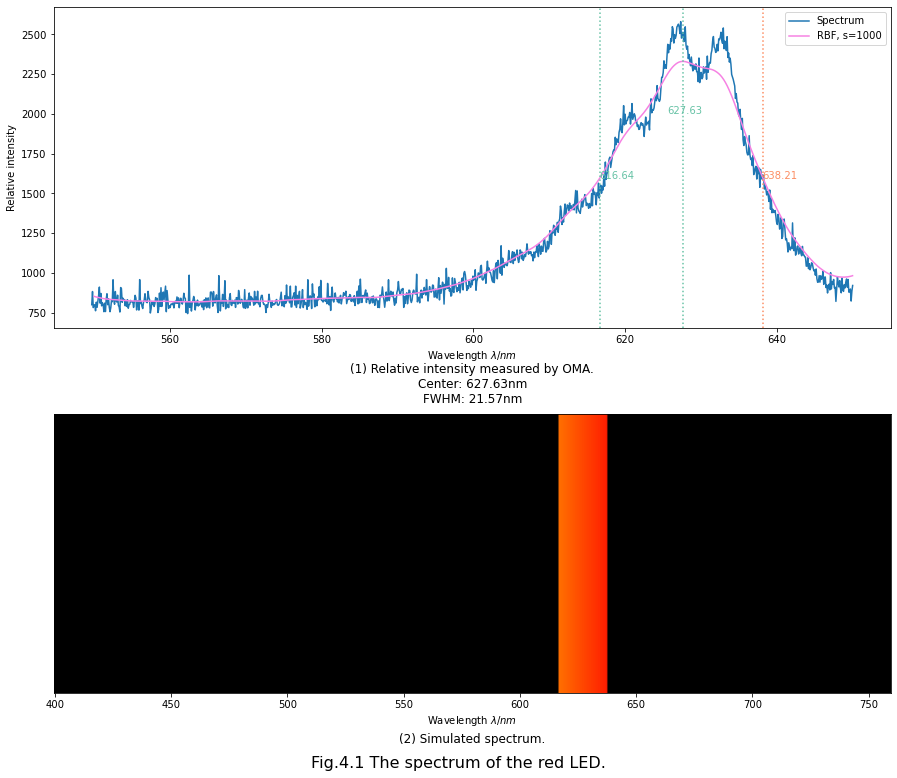

In [86]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_RED.iloc[:, 0], df_RED.iloc[:, 1], label = 'Spectrum')
ax[0].plot(lam_dns, RED_itp, color='#F681E3', label = 'RBF, s=1000')

for i in np.arange(0, len(RED_line), 1):
    ax[0].axvline(x = RED_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(RED_line[i]), xy=(RED_line[i]-2, 2000), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam), 1):
    ax[0].axvline(x = halflam[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam[i]), xy=(halflam[i]-0.08, halfline), color=plt.cm.Set2(i))

ax[0].legend()
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm\nFWHM: {:.2f}nm'.format(RED_line[0],FWHM), y=-0.25)

ax[1] = DrawSpec((np.arange(np.rint(halflam[0]), np.rint(halflam[1]), 1)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.4.1 The spectrum of the red LED.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.4.1.png', bbox_inches='tight', dpi=300)

### blue

In [110]:
df_BLUE = pd.read_csv('C3.1-Data\LED-BLUE.txt', sep='\s+')
df_BLUE['Wavelength'] = np.polyval(scale_func, df_BLUE['Wavelength'])

df_BLUE2 = df_BLUE.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(400,530,10000)
itp_func = Rbf(df_BLUE2.iloc[:, 0], df_BLUE2.iloc[:, 1], smooth = 1000)
BLUE_itp = itp_func(lam_dns)

BLUE_line_index = argrelextrema(np.array(BLUE_itp), np.greater, order=1000)
print(BLUE_line_index)
BLUE_line = lam_dns[BLUE_line_index]
print(BLUE_line)

(array([4838], dtype=int64),)
[462.90029003]


In [111]:
baseline = (BLUE_itp[np.where(BLUE_itp<1000)]).mean()
halfline = (BLUE_itp[BLUE_line_index]+baseline)/2
print(halfline)

halflam = lam_dns[np.where((BLUE_itp >= halfline-1.1) & (BLUE_itp <= halfline+1.1))]
print(halflam)
FWHM = halflam[1] - halflam[0]

[2366.77910808]
[452.66826683 473.17131713]


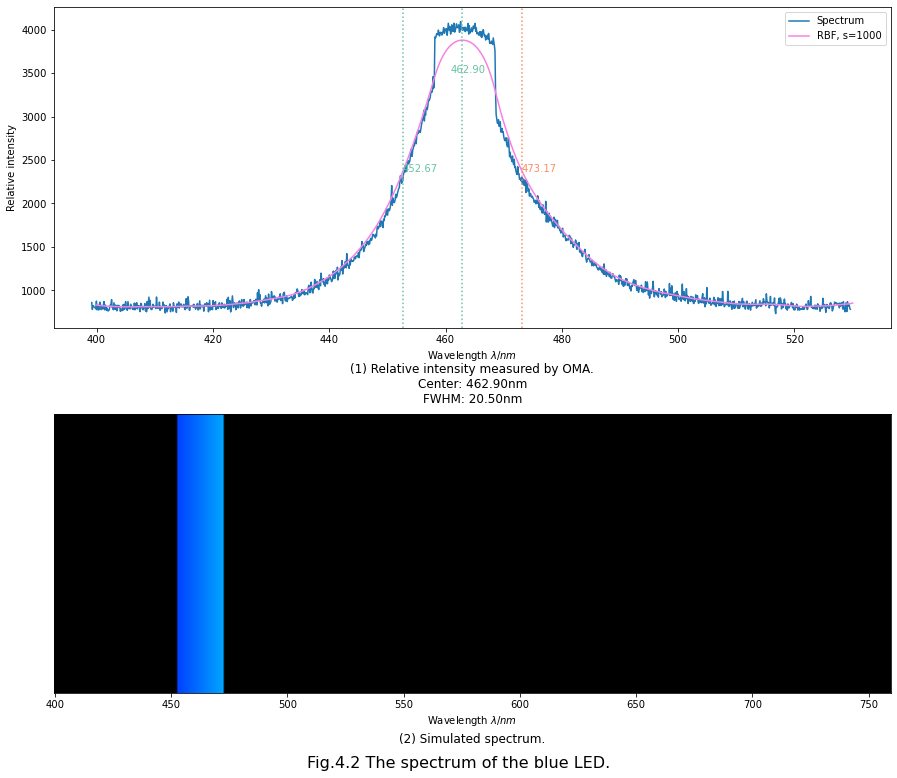

In [112]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_BLUE.iloc[:, 0], df_BLUE.iloc[:, 1], label = 'Spectrum')
ax[0].plot(lam_dns, BLUE_itp, color='#F681E3', label = 'RBF, s=1000')

for i in np.arange(0, len(BLUE_line), 1):
    ax[0].axvline(x = BLUE_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(BLUE_line[i]), xy=(BLUE_line[i]-2, 3500), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam), 1):
    ax[0].axvline(x = halflam[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam[i]), xy=(halflam[i]-0.08, halfline), color=plt.cm.Set2(i))

ax[0].legend()
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm\nFWHM: {:.2f}nm'.format(BLUE_line[0],FWHM), y=-0.25)

ax[1] = DrawSpec((np.arange(np.rint(halflam[0]), np.rint(halflam[1]), 1)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.4.2 The spectrum of the blue LED.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.4.2.png', bbox_inches='tight', dpi=300)

### green

In [150]:
df_GREEN = pd.read_csv('C3.1-Data\LED-GREEN.txt', sep='\s+')
df_GREEN['Wavelength'] = np.polyval(scale_func, df_GREEN['Wavelength'])

df_GREEN2 = df_GREEN.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(450,600,10000)
itp_func = Rbf(df_GREEN2.iloc[:, 0], df_GREEN2.iloc[:, 1], smooth = 1000)
GREEN_itp = itp_func(lam_dns)

GREEN_line_index = argrelextrema(np.array(GREEN_itp), np.greater, order=1000)
print(GREEN_line_index)
GREEN_line = lam_dns[GREEN_line_index]
print(GREEN_line)

(array([4827], dtype=int64),)
[522.41224122]


In [151]:
baseline = (GREEN_itp[np.where(GREEN_itp<1000)]).mean()
halfline = (GREEN_itp[GREEN_line_index]+baseline)/2
print(halfline)

halflam = lam_dns[np.where((GREEN_itp >= halfline-0.5) & (GREEN_itp <= halfline+0.5))]
print(halflam)
FWHM = halflam[1] - halflam[0]

[1803.48214724]
[507.60576058 538.53885389]


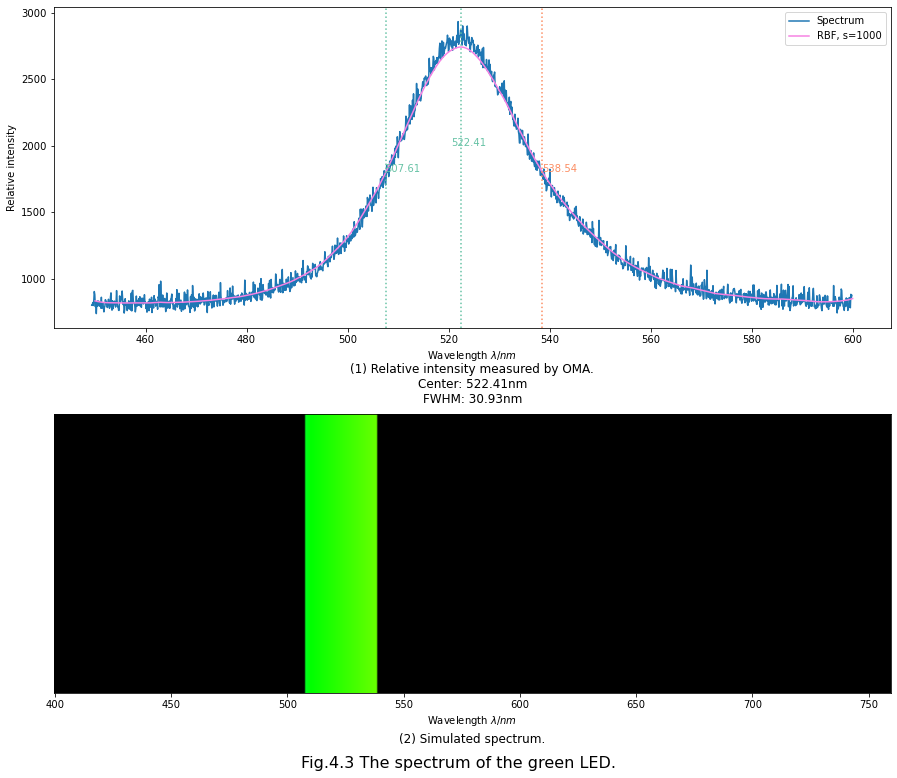

In [152]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_GREEN.iloc[:, 0], df_GREEN.iloc[:, 1], label = 'Spectrum')
ax[0].plot(lam_dns, GREEN_itp, color='#F681E3', label = 'RBF, s=1000')

for i in np.arange(0, len(GREEN_line), 1):
    ax[0].axvline(x = GREEN_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(GREEN_line[i]), xy=(GREEN_line[i]-2, 2000), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam), 1):
    ax[0].axvline(x = halflam[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam[i]), xy=(halflam[i]-0.08, halfline), color=plt.cm.Set2(i))

ax[0].legend()
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm\nFWHM: {:.2f}nm'.format(GREEN_line[0],FWHM), y=-0.25)

ax[1] = DrawSpec((np.arange(np.rint(halflam[0]), np.rint(halflam[1]), 1)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.4.3 The spectrum of the green LED.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.4.3.png', bbox_inches='tight', dpi=300)

### white

In [138]:
df_WHITE = pd.read_csv('C3.1-Data\LED-WHITE.txt', sep='\s+')
df_WHITE['Wavelength'] = np.polyval(scale_func, df_WHITE['Wavelength'])

df_WHITE2 = df_WHITE.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(350,700,10000)
itp_func = Rbf(df_WHITE2.iloc[:, 0], df_WHITE2.iloc[:, 1], smooth = 1000)
WHITE_itp = itp_func(lam_dns)

WHITE_line_index = argrelextrema(np.array(WHITE_itp), np.greater, order=1000)
print(WHITE_line_index)
WHITE_line = [lam_dns[WHITE_line_index][0]]
print(WHITE_line)

(array([2855, 4859], dtype=int64),)
[449.93499349934996]


In [139]:
baseline = (WHITE_itp[np.where(WHITE_itp<1000)]).mean()
halfline = (WHITE_itp[WHITE_line_index]+baseline)/2
halfline = halfline[0]
print(halfline)

halflam = lam_dns[np.where((WHITE_itp >= halfline-3.3) & (WHITE_itp <= halfline+3.3))]
print(halflam)
FWHM = halflam[1] - halflam[0]

2383.405092740191
[440.1340134 460.1910191]


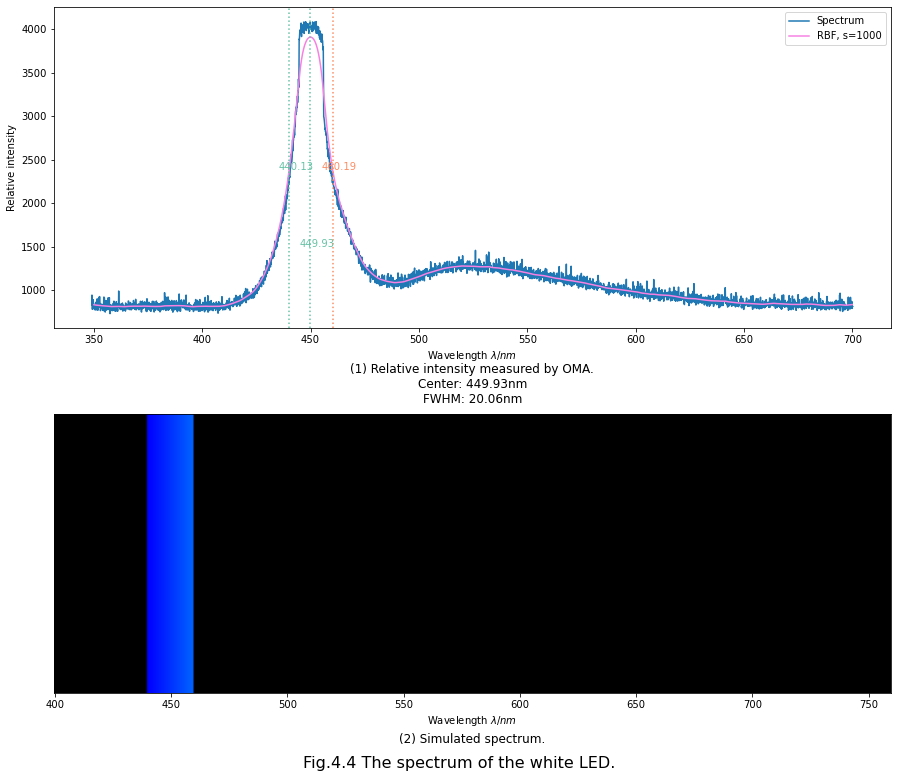

In [144]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_WHITE.iloc[:, 0], df_WHITE.iloc[:, 1], label = 'Spectrum')
ax[0].plot(lam_dns, WHITE_itp, color='#F681E3', label = 'RBF, s=1000')

for i in np.arange(0, len(WHITE_line), 1):
    ax[0].axvline(x = WHITE_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(WHITE_line[i]), xy=(WHITE_line[i]-5, 1500), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam), 1):
    ax[0].axvline(x = halflam[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam[i]), xy=(halflam[i]-5, halfline), color=plt.cm.Set2(i))

ax[0].legend()
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm\nFWHM: {:.2f}nm'.format(WHITE_line[0],FWHM), y=-0.25)

ax[1] = DrawSpec((np.arange(np.rint(halflam[0]), np.rint(halflam[1]), 1)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.4.4 The spectrum of the white LED.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.4.4.png', bbox_inches='tight', dpi=300)

### yellow

In [154]:
df_YELLOW = pd.read_csv('C3.1-Data\LED-YELLOW.txt', sep='\s+')
df_YELLOW['Wavelength'] = np.polyval(scale_func, df_YELLOW['Wavelength'])

df_YELLOW2 = df_YELLOW.drop_duplicates('Wavelength', keep='first')
lam_dns = np.linspace(550,650,10000)
itp_func = Rbf(df_YELLOW2.iloc[:, 0], df_YELLOW2.iloc[:, 1], smooth = 1000)
YELLOW_itp = itp_func(lam_dns)

YELLOW_line_index = argrelextrema(np.array(YELLOW_itp), np.greater, order=1000)
print(YELLOW_line_index)
YELLOW_line = lam_dns[YELLOW_line_index]
print(YELLOW_line)

(array([4149], dtype=int64),)
[591.49414941]


In [155]:
baseline = (YELLOW_itp[np.where(YELLOW_itp<1000)]).mean()
halfline = (YELLOW_itp[YELLOW_line_index]+baseline)/2
print(halfline)

halflam = lam_dns[np.where((YELLOW_itp >= halfline-0.2) & (YELLOW_itp <= halfline+0.2))]
print(halflam)
FWHM = halflam[1] - halflam[0]

[1141.65050773]
[581.37313731 598.54485449]


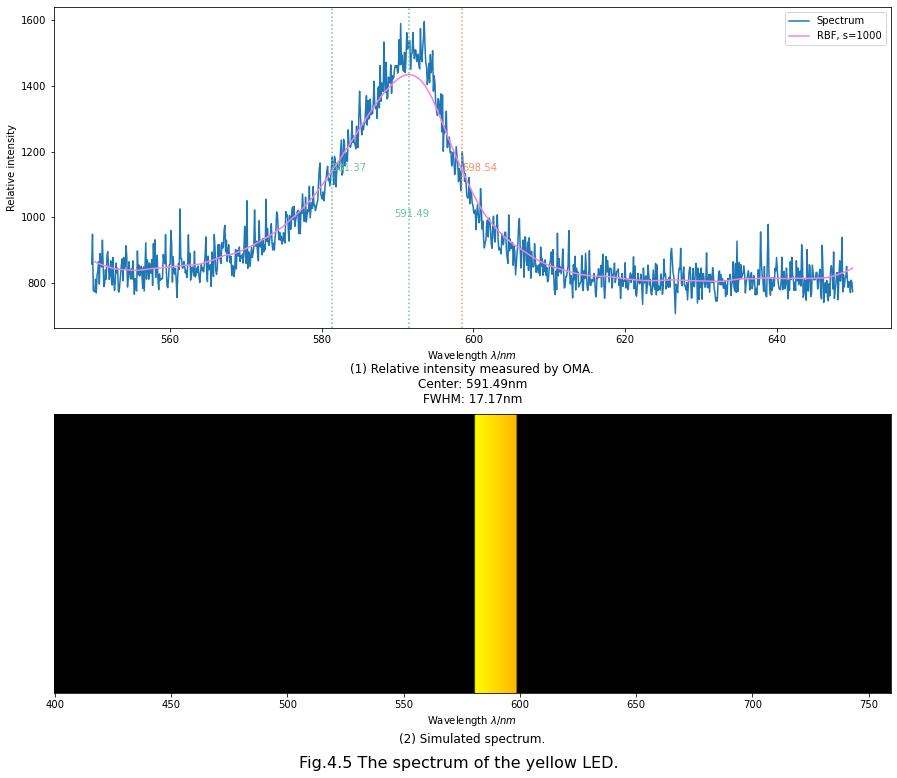

In [156]:
fig, ax =  plt.subplots(2, 1, figsize=(15, 13))
ax[0].plot(df_YELLOW.iloc[:, 0], df_YELLOW.iloc[:, 1], label = 'Spectrum')
ax[0].plot(lam_dns, YELLOW_itp, color='#F681E3', label = 'RBF, s=1000')

for i in np.arange(0, len(YELLOW_line), 1):
    ax[0].axvline(x = YELLOW_line[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(YELLOW_line[i]), xy=(YELLOW_line[i]-2, 1000), color=plt.cm.Set2(i))

for i in np.arange(0, len(halflam), 1):
    ax[0].axvline(x = halflam[i], ls=':', color=plt.cm.Set2(i))
    ax[0].annotate('{:.2f}'.format(halflam[i]), xy=(halflam[i]-0.08, halfline), color=plt.cm.Set2(i))

ax[0].legend()
ax[0].set_xlabel('Wavelength $\lambda /nm$')
ax[0].set_ylabel('Relative intensity')
ax[0].set_title('(1) Relative intensity measured by OMA.\nCenter: {:.2f}nm\nFWHM: {:.2f}nm'.format(YELLOW_line[0],FWHM), y=-0.25)

ax[1] = DrawSpec((np.arange(np.rint(halflam[0]), np.rint(halflam[1]), 1)).astype(int))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.suptitle('Fig.4.5 The spectrum of the yellow LED.', y=0.08, fontsize=16)
plt.savefig(r'C3.1-Output/Fig.4.5.png', bbox_inches='tight', dpi=300)

## Bromine-Tungsten Lamp

In [157]:
df_BT = pd.read_csv('C3.1-Data\Bromine-Tungsten.txt', sep='\s+')
df_BT['Wavelength'] = np.polyval(scale_func, df_BT['Wavelength'])

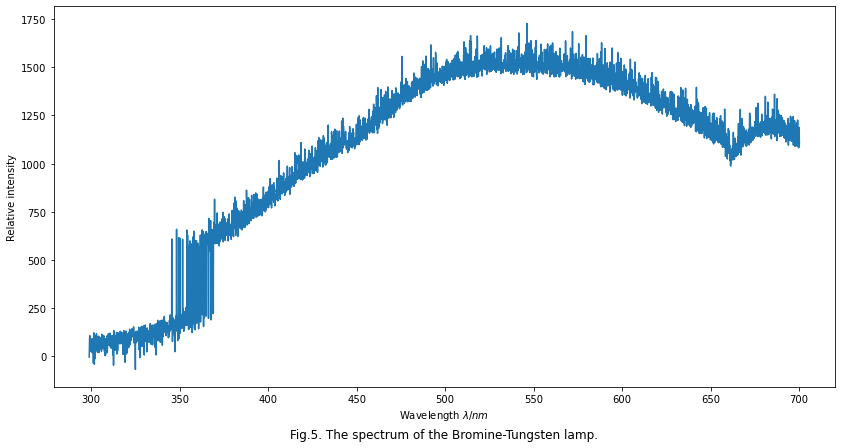

In [159]:
plt.figure(figsize=(14, 7))
plt.plot(df_BT.iloc[:, 0], df_BT.iloc[:, 1])
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Relative intensity')
plt.title('Fig.5. The spectrum of the Bromine-Tungsten lamp.', y=-0.15)
plt.savefig(r'C3.1-Output/Fig.5.png', bbox_inches='tight', dpi=300)